# GRIP-The Sparks Foundation
# Nidhi Karwa
# Data Science and Business Analytics Intern
# TASK 7 - Stock Market Prediction using Numerical and Textual Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.corpus import stopwords
!pip install textblob 
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
df=pd.read_csv("india-news-headlines.csv")
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [3]:
df.shape

(3424067, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [5]:
df.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [6]:
#Train-Test Split
train=df[df['publish_date'] < 20180101]
test=df[df['publish_date'] > 20180101]

In [7]:
#Replace the non charecters with space
data=train['headline_text']
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

C:\Users\nidhi\anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
df['headline_text'] = df['headline_text'].str.lower()

In [9]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
corpus=[]
new= df['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


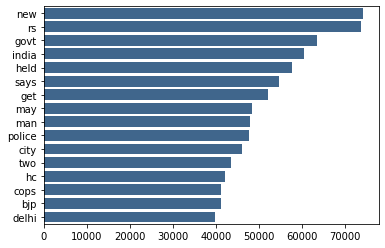

In [10]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sb.barplot(x=y,y=x,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

In [11]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

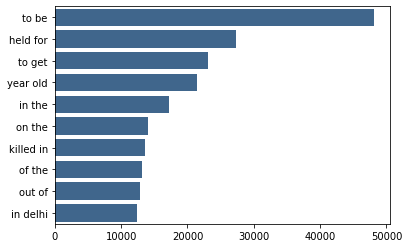

In [12]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sb.barplot(x=y,y=x,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

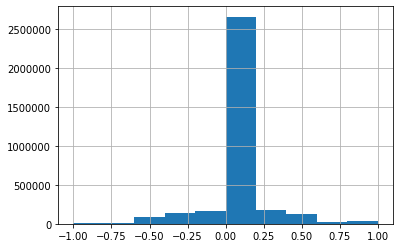

In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity_score']=df['headline_text'].\
   apply(lambda x : polarity(x))
df['polarity_score'].hist()
plt.show()

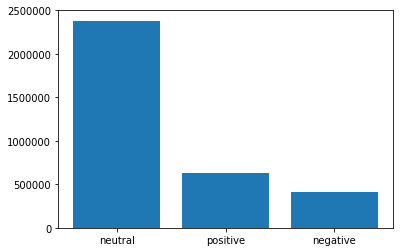

In [14]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity']=df['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity.value_counts().index,df.polarity.value_counts())
plt.show()

In [15]:
df[df['polarity']=='positive']['headline_text'].head()

4            extra buses to clear tourist traffic
12    will qureshi's return really help the govt?
30           extra buses to clear tourist traffic
38    will qureshi's return really help the govt?
52          come to nandi hills...and you can fly
Name: headline_text, dtype: object

In [16]:
df[df['polarity']=='negative']['headline_text'].head()

65         destroying myths and doubts on sexuality
86         powerless north india gropes in the dark
104                        10-year-old girl missing
131              net lottery: a winner or a sucker?
142    mental illness can pass from parent to child
Name: headline_text, dtype: object